In [51]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

Load data

In [4]:
 data = keras.datasets.fashion_mnist

Seperate to learn and test data

In [17]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

Label names

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


&lt;matplotlib.image.AxesImage at 0x1c4835c09b0&gt;

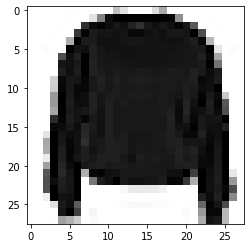

In [19]:
plt.imshow(train_images[7], cmap = plt.cm.binary)

Get values between 0 and 1

In [20]:
train_images = train_images/255.0
test_images = test_images/255.0

Priprava modela: 
784 inputs, hidden layer with 128 neurons, out with 10 outputs

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer
    keras.layers.Dense(128, activation="relu"), #layer in between
    keras.layers.Dense(10, activation="softmax") #output layer
])

Optimize model

In [31]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Train model. Epochs - incrise accuracy of the model by showing same picture multiple times

In [33]:
model.fit(train_images, train_labels, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1981 - accuracy: 0.9250
Epoch 2/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.1915 - accuracy: 0.9272
Epoch 3/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.1886 - accuracy: 0.9293
Epoch 4/10
60000/60000 [==============================] - 8s 142us/sample - loss: 0.1820 - accuracy: 0.9318
Epoch 5/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.1774 - accuracy: 0.9335
Epoch 6/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.1723 - accuracy: 0.9355
Epoch 7/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.1683 - accuracy: 0.9371
Epoch 8/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.1648 - accuracy: 0.9377
Epoch 9/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.1616 - accuracy: 0.9395
Epoc

&lt;tensorflow.python.keras.callbacks.History at 0x1c4cb5c6160&gt;

Tets model

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Tested Acc: ", test_acc)

Tested Acc:  0.8862


Make prediction with model. On output we get 10 arrays

In [37]:
prediction = model.predict(test_images)
print(prediction[0])

[4.02948779e-13 1.12143103e-13 6.06750294e-16 9.95185164e-17
 5.09803773e-16 1.22703796e-07 1.01290775e-14 4.16032155e-04
 3.35366128e-14 9.99583900e-01]


From prediction take the highest number and use it ass preddicted number

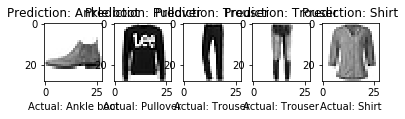

In [53]:
plt.figure()
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("Prediction: " + class_names[np.argmax(prediction[i])])